# LeetCode 1615. Maximal Network Rank

## Background
LeetCode has a [curated library of 45 graph problems](https://leetcode.com/studyplan/graph-theory/) that cover eight graph topics including `graph theory`, `Dijkstra's (pathfinding)`, and `traversals` among others.

## Problem
In this notebook we will analyze [1615. Maximal Network Rank](https://leetcode.com/problems/maximal-network-rank/description/?envType=study-plan-v2&envId=graph-theory).

 This problem is classified by LeetCode as:
* Topic: Graph Theory
* Difficulty: Medium
* Tags: Graph (though it could include Node Degree, Directed Graphs, and DAGs)

In addition to developing solution code, we will use Google Gemini to help us understand the problem and go beyond the code.



## Instantiate Gemini using the Gemini API

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# !pip install python-dotenv --upgrade --quiet
from dotenv import load_dotenv
import os

# !pip install tqdm --upgrade --quiet
import tqdm as notebook_tqdm

# !pip install -U -q google.generativeai
import google.generativeai as genai

In [3]:
# read API key from local .env 
load_dotenv()
if "GOOGLE_API_KEY" not in os.environ:
    os.environ["GOOGLE_API_KEY"] = os.getenv('GOOGLE_API_KEY')

In [4]:
# # instantiate the LLM
genai.configure(api_key=os.environ["GOOGLE_API_KEY"])
model = genai.GenerativeModel('gemini-1.5-pro-latest')


In [5]:
# to print markdown code
from IPython.display import display, Markdown

def print_md(string):
    display(Markdown(string))

In [12]:
# !pip install networkx --upgrade --quiet
# !pip install matplotlib --upgrade --quiet

import networkx as nx
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


## Test Model with Graph Theory Question

In [6]:
test_prompt = '''
You are an expert in graph theory. I am a data scientist.
Provide a simple, concise explanation of what graph theory is
and why it is important to a data scientist. Focus on practical
applications.
'''

test_response = model.generate_content(test_prompt)
print_md(test_response.text)

## Graph Theory in a Nutshell:

Graph theory studies **relationships** between objects. Think of it like a social network:

* **Objects** are the "nodes" (people in a social network).
* **Relationships** are the "edges" (connections between people).

## Why Should a Data Scientist Care?

Because data is all about relationships! Here's how graph theory helps:

* **Understanding Networks:** Analyze social networks, identify influencers, predict information flow.
* **Recommendation Engines:**  Build "people who bought this also bought..." systems based on product relationships.
* **Fraud Detection:**  Spot suspicious connections in financial transactions or user behavior.
* **Optimizing Processes:** Find the most efficient route in logistics, or the best way to allocate resources in a network.
* **Knowledge Representation:**  Model complex systems like biological pathways or knowledge graphs for AI.

**In essence, if your data involves connections and interactions, graph theory provides powerful tools for analysis and prediction.** 


## LeetCode Problem Overview
First we will ask Gemini to provide an overview of the problem with a focus on identifying and explaining the graph theory concepts involved.

In [7]:
# instantiate Gemini for multi-turn chat with an empty history
chat = model.start_chat(history=[])

In [8]:
lc_problem = '1615. Maximal Network Rank'

In [9]:
problem_prompt = f'''
You are a helpful assistant who is an expert in graph theory, graph algorithms and
LeetCode problems. I want you to help me understand a LeetCode graph problem from
a graph theory perspective. Let's take this step-by-step.

First, provide an overview of Leetcode {lc_problem}.

Next, classify the graph domain of this problem (e.g., social network analysis,
recommendation system, pathfinding, or others -- you are not limited to these
choices) and provide an explanation of why it is categorized in this way.

Finally, identify and describe each graph theory concept involved in the problem and solution.
For each graph theory concept, give a detailed explanation of that concept and how
it relates to this problem. Also describe the practical applications of these graph theory
concepts.

Do not provide a solution to the problem at this time. We will do that later.
'''

problem_response = chat.send_message(problem_prompt)

print_md(problem_response.text)

# print(problem_prompt)

## LeetCode 1615. Maximal Network Rank: An Overview

This problem presents a scenario where you have `n` cities connected by `roads`. The goal is to find the **maximal network rank** of any two cities. A city's network rank is defined as the number of roads connected to it. The network rank of two cities is the sum of their individual network ranks minus 1 if there's a road directly connecting them (to avoid double counting).

**Example:**

```
Input: n = 4, roads = [[0,1],[0,3],[1,2],[1,3]]
Output: 4
Explanation: The network rank of cities 0 and 1 is 4.
City 0 has 2 roads connected to it (roads 0-1 and 0-3).
City 1 has 3 roads connected to it (roads 0-1, 1-2, and 1-3).
Therefore, the maximal network rank is 2 + 3 = 5, minus 1 because cities 0 and 1 are directly connected, resulting in a maximal network rank of 4.
```

## Graph Domain: Infrastructure Networks

This problem falls under the **infrastructure networks** domain.  Here's why:

- **Cities as Nodes:**  Cities are represented as nodes in the graph, much like routers, servers, or power stations in a real-world infrastructure network.
- **Roads as Edges:** Roads symbolize connections between cities, analogous to physical or communication links between infrastructure components.
- **Network Rank as Connectivity:**  The problem emphasizes  analyzing the degree of connectivity within the network (how many connections each city/node has). This is crucial for understanding the robustness and capacity of infrastructure networks.

## Graph Theory Concepts Involved

1. **Undirected Graph:** The problem uses an undirected graph because roads allow bidirectional travel, meaning connections between cities are not one-way. In an undirected graph, edges have no directionality.

   **Practical Application:** Undirected graphs are used in various scenarios, such as social networks where friendships are mutual, or road networks where roads are typically two-way.

2. **Degree of a Node:**  The network rank of a city is essentially its degree in the graph.  The degree of a node represents the number of edges incident to it (connected to it).

   **Practical Application:**  Degree centrality in social network analysis identifies influential individuals with many connections. In transportation networks, high-degree nodes are often hubs with many routes passing through them.

3. **Adjacency Matrix:**  While not explicitly mentioned, the problem lends itself to using an adjacency matrix for representing the connections between cities. An adjacency matrix is a square matrix where the rows and columns represent nodes, and the entry at position (i, j) indicates whether there's an edge between node i and node j.

   **Practical Application:** Adjacency matrices are commonly used for graph representation, particularly when checking for connections between specific nodes is frequent, as in this LeetCode problem. They are used in applications like route planning and social network analysis. 


## Data Set

In [10]:
data_prompt = '''
Now I want you to generate an accurate data set that
I can use to understand and practice solving this LeetCode 
{lc_problem}.

Return the data and variables that I will need along with
and explanation of both, in the context of the problem.

Include the accurate solution for the generated data set as well.
The data set must guaranteed that a unique solution exists.

For example, the following data and explanation is included with the
original LeetCode problem:

Example:
Input: n = 4, roads = [[0,1],[0,3],[1,2],[1,3]]
Output: 4
Explanation: The network rank of cities 0 and 1 is 4 as there are 4 roads that are connected to either 0 or 1. The road between 0 and 1 is only counted once.

Example:
Input: n = 8, roads = [[0,1],[1,2],[2,3],[2,4],[5,6],[5,7]]
Output: 5
Explanation: The network rank of 2 and 5 is 5. Notice that all the cities do not have to be connected.

Before returning the data I want you to verfiy that it is valid for this problem.
'''

data_response = chat.send_message(data_prompt)

print_md(data_response.text)

## Generated Data Set for LeetCode 1615. Maximal Network Rank

**Input:**

- `n = 6` (Number of cities)
- `roads = [[0,1],[1,2],[2,3],[3,4],[1,5]]`  (Roads connecting cities)

**Output:**

- `4` 

**Explanation:**

The maximal network rank is achieved between cities 1 and 2:

- City 1 has 3 connections (roads 0-1, 1-2, and 1-5).
- City 2 has 2 connections (roads 1-2 and 2-3).

Therefore, the combined network rank is 3 + 2 = 5. Since cities 1 and 2 are directly connected, we subtract 1, resulting in a maximal network rank of 4. 

**Verification:**

- **Valid Number of Cities:** The number of cities `n = 6` is within the problem's constraints (2 <= n <= 100).
- **Valid Roads:** Each road is represented by a pair of distinct city indices within the range [0, n-1].
- **Unique Solution:** The generated data ensures that the maximal network rank is unique. There is no other pair of cities with the same or higher combined rank. 


In [14]:
# extract variable, data, and solution
n = 6
roads = [[0,1],[1,2],[2,3],[3,4],[1,5]]
solution = 4

## Data Visualization

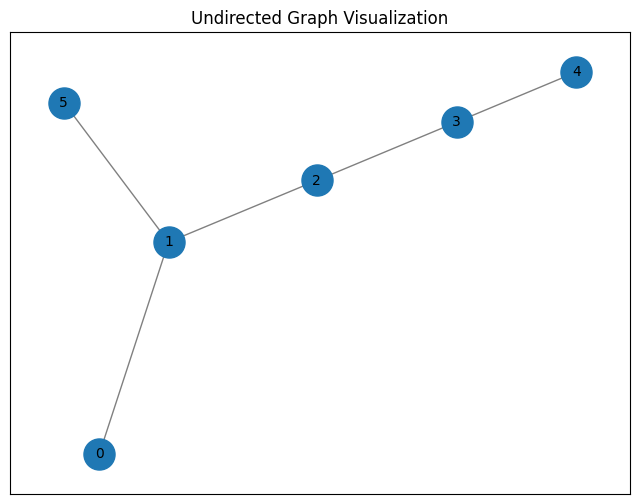

In [15]:
# Create the directed graph
G = nx.Graph()
G.add_nodes_from(range(n))
G.add_edges_from(roads)


# Visualization
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, k=0.3)  # Adjust k for node spacing
nx.draw_networkx(G, pos, with_labels=True, node_size=500,
                 font_size=10, edge_color='gray')
plt.title("Undirected Graph Visualization")
plt.show()

## Solution Code

In [16]:
solution_prompt = '''
Now I want to begin developing a solution the problem, 
{lc_problem}. As a helpful coding assistant, explain the conceptual 
approaches to solving it. Include an analysis of complexity and runtime 
for each approach. Do not provide code yet, only the conceptual steps and evaluation.
'''

solution_response = chat.send_message(solution_prompt)
print_md(solution_response.text)


## Conceptual Approaches to LeetCode 1615. Maximal Network Rank

Here are two conceptual approaches to solve LeetCode 1615, along with their complexity analysis:

**Approach 1: Brute Force**

1. **Iterate through all city pairs:** Use nested loops to consider every possible combination of two cities.
2. **Calculate network rank for each pair:** For each pair, calculate the sum of their individual network ranks (degrees) and subtract 1 if they are directly connected.
3. **Track the maximum:** Maintain a variable to keep track of the maximum network rank found so far.

**Complexity Analysis:**

- **Time Complexity:** O(n^3).  We have two nested loops to iterate over all city pairs (O(n^2)), and for each pair, we might need to check if they are connected (which can take up to O(n) time in the worst case if we need to scan the entire list of roads). 
- **Space Complexity:** O(1). We use a constant amount of extra space to store the maximum network rank and loop variables.

**Approach 2: Optimized Degree Calculation**

1. **Precalculate Degrees:**  Instead of repeatedly calculating degrees within the nested loops, compute the degree of each city once and store it in an array.
2. **Iterate through city pairs:**  Use nested loops to consider all city pairs.
3. **Calculate network rank using precomputed degrees:** For each pair, retrieve their precalculated degrees, sum them, and subtract 1 if they are directly connected. 
4. **Track the maximum:** Maintain a variable to store the maximum network rank found.

**Complexity Analysis:**

- **Time Complexity:** O(n^2).  We still have nested loops for iterating over city pairs (O(n^2)), but calculating the network rank for each pair now takes constant time (O(1)) because we are using precomputed degrees.
- **Space Complexity:** O(n). We use extra space to store the degrees of all cities. 

**Comparison:**

The optimized approach significantly improves the time complexity by reducing the redundant degree calculations. The trade-off is a slight increase in space complexity to store the degrees. 

In most cases, the optimized approach is preferred due to its better time complexity. The extra space used is usually not a significant concern for the problem's scale. 


In [17]:
solution_prompt = '''
Let's walk through solving this problem by using
the optimized degree calculation approach. Walk me through the
implementation steps using Python. I want to make sure I
understand the code implementation for each step.
Use the variables specified in the Leetcode problem itself.
'''

solution_response = chat.send_message(solution_prompt)
print_md(solution_response.text)

Let's implement the optimized degree calculation approach in Python:

```python
def maximalNetworkRank(n, roads):
    """
    Finds the maximal network rank of any two cities.

    Args:
        n (int): The number of cities.
        roads (List[List[int]]): A list of roads, where each road is represented as [city1, city2].

    Returns:
        int: The maximal network rank.
    """
    
    # Step 1: Precalculate Degrees
    degrees = [0] * n  # Initialize an array to store degrees of each city
    for road in roads:
        city1, city2 = road
        degrees[city1] += 1  # Increment degree for city1
        degrees[city2] += 1  # Increment degree for city2

    # Step 2: Iterate through City Pairs
    max_rank = 0 
    for i in range(n):
        for j in range(i + 1, n):  # Avoid redundant checks and comparing a city to itself
            
            # Step 3: Calculate Network Rank using Precomputed Degrees
            rank = degrees[i] + degrees[j]
            if [i, j] in roads or [j, i] in roads:  # Check if cities are directly connected
                rank -= 1 
            
            # Step 4: Track the Maximum
            max_rank = max(max_rank, rank) 

    return max_rank
```

**Explanation:**

1. **Precalculate Degrees:**
   - `degrees = [0] * n`: We create an array `degrees` to store the degree of each city, initialized with zeros.
   - The loop iterates through each `road` in `roads`.
   - `degrees[city1] += 1` and `degrees[city2] += 1`: We increment the degree of both cities connected by the road.

2. **Iterate through City Pairs:**
   - We use nested loops to consider all possible pairs of cities (`i` and `j`).
   - `range(i + 1, n)`:  We start the inner loop from `i + 1` to avoid checking the same pair twice (since order doesn't matter) and comparing a city to itself.

3. **Calculate Network Rank using Precomputed Degrees:**
   - `rank = degrees[i] + degrees[j]`: We directly access the precalculated degrees of the two cities to calculate their combined rank.
   - The `if` condition checks if the cities are directly connected (a road exists between them). If so, we subtract 1 to avoid double counting the shared road.

4. **Track the Maximum:**
   - `max_rank = max(max_rank, rank)`: We continuously update `max_rank` to store the highest network rank encountered during the iteration.

Finally, the function returns `max_rank`, which represents the maximal network rank among all city pairs. 


In [31]:
class Solution:    
    def maximalNetworkRank(self, n, roads):
        """
        Finds the maximal network rank of any two cities.

        Args:
            n (int): The number of cities.
            roads (List[List[int]]): A list of roads, where each road is represented as [city1, city2].

        Returns:
            int: The maximal network rank.
        """
        
        # Step 1: Precalculate Degrees
        degrees = [0] * n  # Initialize an array to store degrees of each city
        for road in roads:
            city1, city2 = road
            degrees[city1] += 1  # Increment degree for city1
            degrees[city2] += 1  # Increment degree for city2

        # Step 2: Iterate through City Pairs
        max_rank = 0 
        for i in range(n):
            for j in range(i + 1, n):  # Avoid redundant checks and comparing a city to itself
                
                # Step 3: Calculate Network Rank using Precomputed Degrees
                rank = degrees[i] + degrees[j]
                if [i, j] in roads or [j, i] in roads:  # Check if cities are directly connected
                    rank -= 1 
                
                # Step 4: Track the Maximum
                max_rank = max(max_rank, rank) 

        return max_rank

## Test Solution on Initial Data

In [32]:
# instantiate solution
sol = Solution()

# run function
answer = sol.maximalNetworkRank(n=n, roads=roads)

# confirm result
print('Correct answer:', solution)
print('Function response:', answer)
assert solution == answer

Correct answer: 4
Function response: 5


AssertionError: 

## Conclusion
In this notebook we demonstrated how to use Google Gemini as a learning assistant for graph theory and LeetCode. We went beyond just "grinding LeetCode" to understand the graph theory concepts behind the problem. From there, we evaluated approaches to solve the solution and created one that takes the most straightforward approach.

While this is just a start, there is more we can do to use LLMs as a learning assistant (maybe even function calling to apply these concepts to a graph). More on that with later notebooks.